In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
df1 = pd.DataFrame(dataset,columns=['Name','Wage','Value'])
df1.head(3)

,Name,Wage,Value
0,L. Messi,€565K,€110.5M
1,Cristiano Ronaldo,€405K,€77M
2,Neymar Jr,€290K,€118.5M


In [6]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = df1['Wage'].replace('[\€,]','',regex=True).apply(value_to_float)
value= df1['Value'].replace('[\€,]','',regex=True).apply(value_to_float)

df1['Wage'] = wage
df1['Value'] = value
df1['difference'] = df1['Value'] - df1['Wage']

In [7]:
df1.sort_values('difference',ascending=False).head()

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0


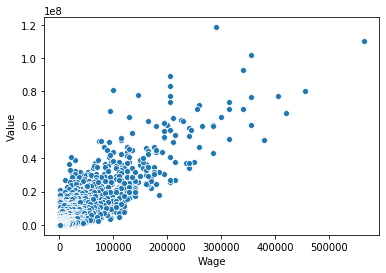

In [8]:
graph = sns.scatterplot(x='Wage', y='Value',data=df1)
graph

# Creating Dyanamic Graph

In [11]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool
TOOLTIPS = HoverTool(tooltips=[
     ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name")]
)                     


p = figure(title="Fifa_2019",x_axis_label="Wage",y_axis_label='Value',plot_width=700,plot_height=700,tools=[TOOLTIPS])
p.circle('Wage','Value',size=10,source=df1)
show(p)

In [12]:
df_2 = dataset.copy()

In [13]:
output = df_2.drop_duplicates()
len(output.groupby('Nationality').size())

164

In [14]:
#Total no of Indian Players
print(output.groupby('Nationality').size()['India'])

30


In [16]:
#Lets lake a look at players of india
indians = df_2[df_2['Nationality']=='India']
indians.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8605,8605,190939,S. Chhetri,33,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67,67,NaN,...,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0,NaN
10011,10011,223763,S. Jhingan,24,https://cdn.sofifa.org/players/4/19/223763.png,India,https://cdn.sofifa.org/flags/159.png,65,71,NaN,...,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0,NaN
12598,12598,217225,J. Lalpekhlua,27,https://cdn.sofifa.org/players/4/19/217225.png,India,https://cdn.sofifa.org/flags/159.png,63,64,NaN,...,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0,NaN


In [17]:
best_finisher = dataset[dataset['Finishing']==max(dataset['Finishing'])]
best_finisher['Name'][0]

'L. Messi'

In [18]:
best_crossing = dataset[dataset['Crossing'] == max(dataset['Crossing'])]
best_crossing['Name'].values[0]

'K. De Bruyne'

In [19]:
best_reaction = dataset[dataset['Reactions'] == max(dataset['Reactions'])]
best_reaction['Name'].values[0]

'Cristiano Ronaldo'

In [20]:
best_crossing = dataset[dataset['Stamina'] == max(dataset['Stamina'])]
best_crossing['Name'].values[0]

'N. Kanté'

In [21]:
best_crossing = dataset[dataset['Strength'] == max(dataset['Strength'])]
best_crossing['Name'].values[0]

'A. Akinfenwa'

In [22]:
dataset['Value'] = value
dataset['Wage'] = wage

In [25]:
highest_earner = dataset[dataset['Wage'] == max(dataset['Wage'])]
highest_demand = dataset[dataset['Value'] == max(dataset['Value'])]
print('Highest demand is of {0}'.format(highest_demand['Name'].values[0]))
print('Highest earner is of {0}'.format(highest_earner['Name'].values[0]))

Highest demand is of Neymar Jr
Highest earner is of L. Messi


In [26]:
df = dataset.copy()

In [27]:
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


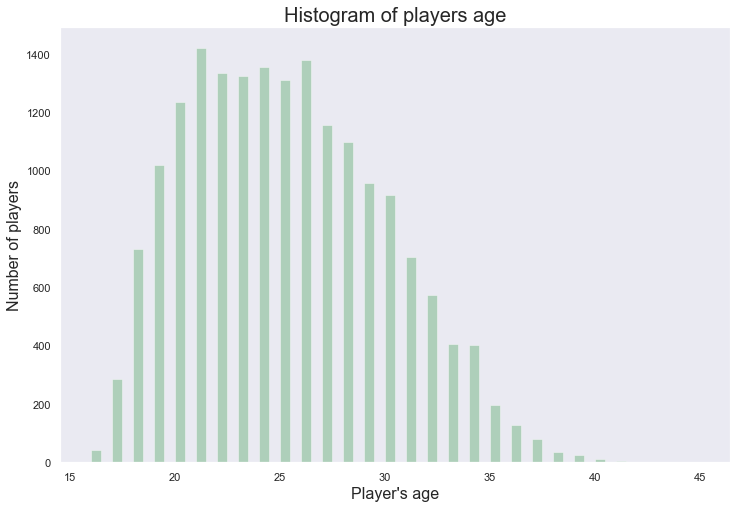

In [28]:
# Histogram: number of players's age
sns.set(style ="dark", color_codes=True)
x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

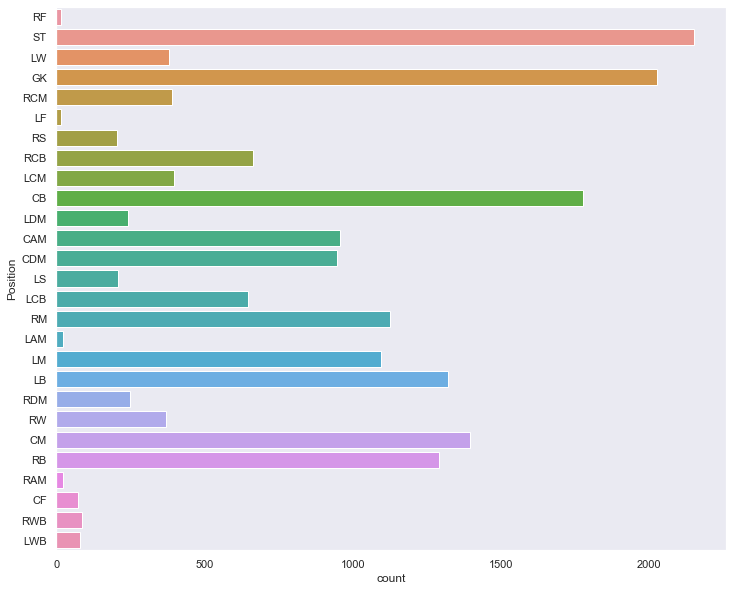

In [29]:
#To count players in different positions
plt.figure(figsize=(12,10))
sns.countplot(y='Position',data=df)
plt.show()

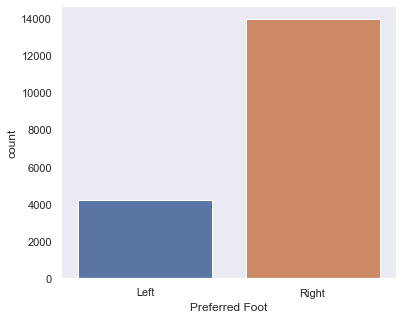

In [30]:
#Visualizing How many players are right or left footed
plt.figure(figsize = (6,5))
sns.countplot('Preferred Foot',data = df)
plt.show()

# Top 5 Popular Players

In [33]:
df_2[df_2['International Reputation']==5]['Name']

0               L. Messi
1      Cristiano Ronaldo
2              Neymar Jr
7              L. Suárez
22              M. Neuer
109       Z. Ibrahimović
Name: Name, dtype: object

# The best player per position

In [34]:
((df_2.iloc[df_2.groupby(df_2['Position'])['Overall'].idxmax()][['Name', 'Position']]))

,Name,Position
17,A. Griezmann,CAM
12,D. Godín,CB
20,Sergio Busquets,CDM
271,Luis Alberto,CF
67,Thiago,CM
3,De Gea,GK
28,J. Rodríguez,LAM
35,Marcelo,LB
24,G. Chiellini,LCB
11,T. Kroos,LCM


In [35]:
df_2['Nationality'].value_counts()[:5]

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

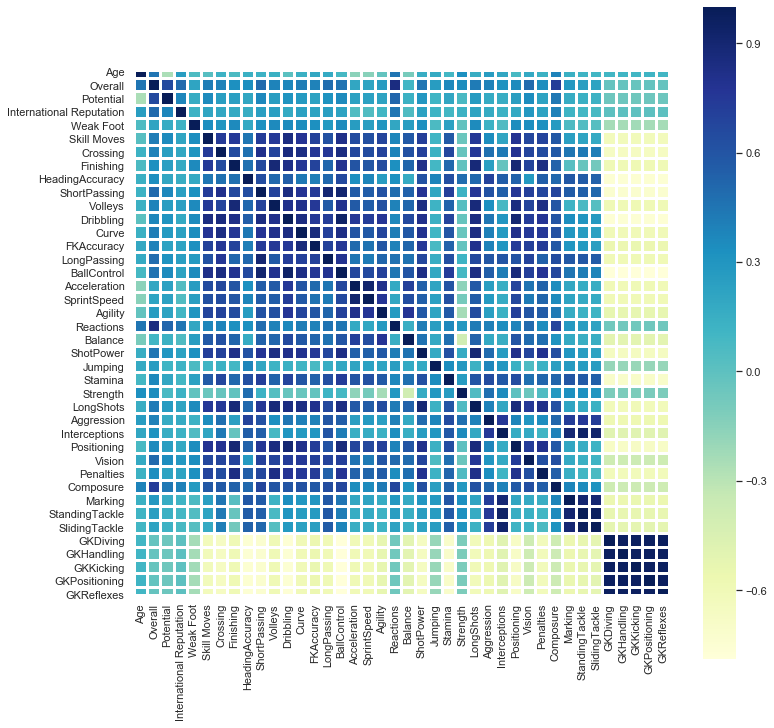

In [36]:
#Draw the heatmap
plt.figure(figsize=(12,12))
corr = df.corr()
sns.heatmap(corr,square=True,cmap="YlGnBu",linewidths=2,)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [38]:
len(df.columns)

45

In [39]:
new_df = df.drop(['Age','Nationality','International Reputation','Real Face'],axis=1)

In [41]:
len(new_df.columns)

41

In [42]:
new_df = new_df.dropna()

In [43]:
new_df = new_df.drop(['Work Rate'],axis=1)

In [44]:
new_df = pd.get_dummies(new_df,columns=['Preferred Foot'],drop_first=True)

In [45]:
new_df = pd.get_dummies(new_df,columns=['Position'],drop_first=True)

In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 65 columns):
Overall                 18147 non-null int64
Potential               18147 non-null int64
Weak Foot               18147 non-null float64
Skill Moves             18147 non-null float64
Crossing                18147 non-null float64
Finishing               18147 non-null float64
HeadingAccuracy         18147 non-null float64
ShortPassing            18147 non-null float64
Volleys                 18147 non-null float64
Dribbling               18147 non-null float64
Curve                   18147 non-null float64
FKAccuracy              18147 non-null float64
LongPassing             18147 non-null float64
BallControl             18147 non-null float64
Acceleration            18147 non-null float64
SprintSpeed             18147 non-null float64
Agility                 18147 non-null float64
Reactions               18147 non-null float64
Balance                 18147 non-null float64
Sh

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(new_df)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
recommendations = NearestNeighbors(n_neighbors=6,algorithm='kd_tree')
recommendations.fit(X)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=6, p=2, radius=1.0)

In [49]:
#Get similar player index
player_index = recommendations.kneighbors(X)[1]

In [50]:
player_index

array([[    0,    50,   528,   890,  1774,  3759],
       [    1,    23,    10,    87,    16,   124],
       [    2,    32,    29,   319,   384,   731],
       ...,
       [18144, 17956, 18117, 17145, 17848, 17786],
       [18145, 17856, 18029, 17481, 17906, 17665],
       [18146, 18135, 18039, 18092, 17997, 18091]], dtype=int64)

In [51]:
df_2 = df_2.dropna()

In [52]:
dataset_2 = new_df.copy()

In [53]:
dataset_2['Name'] = dataset['Name']
dataset_2['Position']=dataset['Position']

In [54]:
dataset_2 = dataset_2.dropna()

In [55]:
dataset_2['Club'] = dataset['Club']

In [56]:
dataset_2 = dataset_2.dropna()

In [57]:
dataset_2.head(2)

,Overall,Potential,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Name,Position,Club
0,94,94,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,...,0,1,0,0,0,0,0,L. Messi,RF,FC Barcelona
1,94,94,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,...,0,0,0,0,0,0,1,Cristiano Ronaldo,ST,Juventus


In [58]:
def get_index(x):
    return dataset_2[dataset_2['Name']==x].index.tolist()[0]

def recommend_similar(player):
    print(f'Similar players to {player} are')
    index = get_index(player)
    for i in player_index[index][1:]:
        print("<>Name is {0} , Position is {1} , Club is {2}".format(dataset_2.iloc[i]['Name'],dataset_2.iloc[i]['Position'],dataset_2.iloc[i]['Club']))
    

In [59]:
recommend_similar(player='Cristiano Ronaldo')

Similar players to Cristiano Ronaldo are
<>Name is S. Agüero , Position is ST , Club is Manchester City
<>Name is R. Lewandowski , Position is ST , Club is FC Bayern München
<>Name is A. Lacazette , Position is ST , Club is Arsenal
<>Name is H. Kane , Position is ST , Club is Tottenham Hotspur
<>Name is M. Depay , Position is ST , Club is Olympique Lyonnais


In [60]:
recommend_similar('Sergio Ramos')

Similar players to Sergio Ramos are
<>Name is Thiago Silva , Position is RCB , Club is Paris Saint-Germain
<>Name is T. Alderweireld , Position is RCB , Club is Tottenham Hotspur
<>Name is L. Bonucci , Position is RCB , Club is Juventus
<>Name is Juiano Mestres , Position is RCB , Club is Cruzeiro
<>Name is Dante , Position is CB , Club is OGC Nice


# Using regression ,to predict rating of player

In [61]:
df = dataset.copy()
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head(3)

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0


In [63]:
# As we can see the players are either left footed or right.
#There are also various categorical features ,that should be converted into int
#let's do it.

In [64]:
df = pd.get_dummies(df,drop_first=True)

In [67]:
df.head(3)

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,0,0,0,0,1,0,0,0,0,0
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,0,0,0,0,0,0,0,0,0,1
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y = df.Overall
X = df.drop(['Overall'],axis=1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 238) (14517, 238)
(3630,) (14517,)


In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9402393973445676
RMSE : 1.706676338069218


In [98]:
import matplotlib as mpl

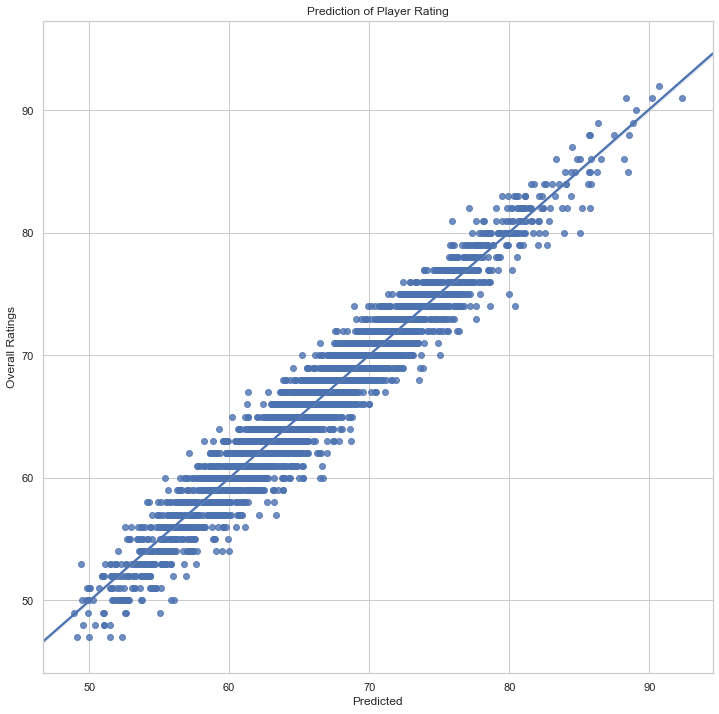

In [102]:
fig, ax = plt.subplots(figsize=(12,12))
sns.regplot(predictions,y_test)
plt.xlabel('Predicted')
plt.ylabel('Overall Ratings')
plt.title("Prediction of Player Rating")
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.show()

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
y_pred = regressor.predict(X_test)

#Finding the r2 score and root mean squared error
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test,y_pred))))

r2 score: 0.9944835425058751
RMSE : 0.5185299202909265
